# Applied Data Science Capstone - Fourth Week Exercise <a class="anchor" id="TOP"></a>
## Table of Contents

<ul>
    <li><a href="#ITBP">Introduction to Business Problem</a></li>
    <li><a href="#BCD">Brief Description of Colombia</a></li>
    <li><a href="#DS">Data Sources</a></li>
    <li><a href="#DPC">Data Preparation Challenges</a></li>
    <li><a href="#DSMPL">Data Sampling</a></li>
    <ul>
        <li><a href="#HCR">Historical Criminal Records</a></li>
        <li><a href="#PN">Population per Neighbourhood</a></li>
        <ul>
            <li><a href="#LUT">Living Units Table</a></li>
            <li><a href="#HT">Households Table</a></li>
            <li><a href="#DT">Deaths Table</a></li>
            <li><a href="#IT">Individuals Table</a></li>
            <li><a href="#GRDT">Geo-Referencial Data Table</a></li>
        </ul>
        <li><a href="#NP">Neighbourhood Polygons</a></li>
    </ul>
    <li><a href="#PC">Partial Conclusions</a></li>
</ul>


<style>
#ColMap  {
 float: right;    
 margin: 0 0 0 15px;
}
</style>
## Introduction to Business Problem <a class="anchor" id="ITBP"></a>
<img src="resources/World-Data-Locator-Map-Colombia.jpg" alt="Drawing" style="width: 300px; float: right; margin: 25px 0 0 15px;" align="left" />
<!--
https://es.wikipedia.org/wiki/Colombia#/media/Archivo:COL_orthographic_(San_Andr%C3%A9s_and_Providencia_special).svg
-->
Let's suppose I work for a retail company trying to position a new store format of small convenience stores.  
In the first part of this exercise, it is required to compare large cities in Colombia  - South America with cities with similar population in Europe and North America trying to establish if they are more like americans or europeans.  It may help this hypothetical retail convenience store chain to determine if their stores format should follow European or American model.  
In the second part of the study I will try to test a procedure to select places to open new stores, and determine criteria that consider low coverage, low crime rate, and large population.  
A priory, the stewardship committee think that good location for new stores are those places with lack of coverage (small number of other convenience stores), high population, and low crime rate.  
My (hypothetical) sponsor is also interested in clustering neighbourhoods based on the recent census information to see if they can identify neighbourhood particularities that can be considered to personalize store formats.  
For this study, I will limit my effort to Medellín, but the objective is establish a repeatable procedure that can be then used to analyze other cities such as Bogotá, Cali, Barranquilla.  
<br><a href="#TOP">Return to Top</a>

## Brief Description of Colombia <a class="anchor" id="BDC"></a>
Colombia is a country located north of South America, with an estimated population of 48 million people, and a GDP of US<span>&#36;</span>  744,696 or US<span>&#36;</span>  14,943 per capita.
<br><a href="#TOP">Return to Top</a>

## Data Sources <a class="anchor" id="DS"></a>
<ul>
<li>Historical Criminal Records: "Ministerio de Defensa Nacional - Policía Nacional". This information is publicly available at https://www.policia.gov.co/grupo-informaci%C3%B3n-criminalidad/estadistica-delictiva</li>
<li>National Census Information: "Censo Nacional de Población y Vivienda". This information is publicly available at https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/censo-nacional-de-poblacion-y-vivenda-2018</li>
<li>Borders of neighbourhoods, Medellín city: https://geomedellin-m-medellin.opendata.arcgis.com/datasets/limite-barrio-vereda-catastral/geoservice</li>
<li>FourSquare: information available through Foursquare API</li>
</ul>
<br><a href="#TOP">Return to Top</a>

## Data Preparation Challenges <a class="anchor" id="DPC"></a> 
There are several challenges in preparing the information. One of the issues to resolve is that there isn't a consistent Postal Zone classification as in other countries.  Neighbourhood definition may not be consistent across different information sources and neighbourhood names are also inconsistent among sources.  At this time, I am not sure that combining this information can be done at a reasonable effort for this exercise.  
For this study I may face some data limitations as not having enough discrimination on criminal statistics by neighbourhood and/or postal zone in colombian cities and not having information on profitability of existing convenience stores.  So, the first effort will be to search for information sources and try to combine them in a way that allows me to enrich information available in Foursquare. let's see how good is the available data.
<br><a href="#TOP">Return to Top</a>

## Data Sampling <a name='DSMPL'></a>
This chapter explore and sample the available data to enrich Foursquare data for our study.
<p> Before start exploring data, we import some features we will need during the workshop.</p>
<a href="#TOP">Return to Top</a>

In [39]:
# import required packages to explore data
import pandas as pd
import geopandas as gpd
import wget
import matplotlib.pyplot as plt
%matplotlib inline

### Historical Criminal Records <a name='HCR'></a>
These records are compiled and for National Police Boureau.  Let's explore some of the files, their layout and comment on their particularities. 

In [4]:
# the following url corresponds to one of the several files available.  
# A good exercise will be to design an automatic way of exploring the official police page to learn..
url = "https://www.policia.gov.co/file/207699/download?token=kDuHkaXx"
filename = wget.download(url)
filename

'hurto-personas-2018_segunda_parte (1).xlsx'

Exploring the database, it can be seen that first 8 rows and last 4 rows has to be ignored (see the following image of the header of the spreadsheet)    
<img src="resources/PN_Sample.jpg" alt="Drawing" style="width: 600px; float: none;" align="left" />

In [5]:
sampleCrimeDF = pd.read_excel(filename, skiprows=8, skipfooter=4)
sampleCrimeDF.head()

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
0,2018-07-01,AMAZONAS,LETICIA (CT),Domingo,20:00:00,PUNTA BRAVA,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,23,FEMENINO,UNION LIBRE,HONDURAS,ESTUDIANTE,ADMINISTRACION DE EMPRESAS,SUPERIOR,91001000,1
1,2018-07-01,ANTIOQUIA,BARBOSA,Domingo,15:00:00,VDA. LA PLAYA,RURAL,CENTRO TURÍSTICO,ARMA BLANCA / CORTOPUNZANTE,A PIE,CONDUCTOR MOTOCICLETA,32,MASCULINO,UNION LIBRE,COLOMBIA,SECTOR IND,-,NO REPORTADO,5079000,1
2,2018-07-01,ANTIOQUIA,BARBOSA,Domingo,02:30:00,LOS BUCAROS,RURAL,QUEBRADA,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,44,FEMENINO,UNION LIBRE,COLOMBIA,AMA DE CASA,-,SECUNDARIA,5079000,1
3,2018-07-01,ANTIOQUIA,BELLO,Domingo,20:00:00,CIUDADELA DEL NORTE,URBANA,ESCENARIOS DEPORTIVOS,SIN EMPLEO DE ARMAS,A PIE,A PIE,18,FEMENINO,SOLTERO,COLOMBIA,ESTUDIANTE,-,TECNOLOGO,5088000,1
4,2018-07-01,ANTIOQUIA,BELLO,Domingo,03:00:00,PRADO,URBANA,VIAS PUBLICAS,CONTUNDENTES,A PIE,A PIE,31,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,SECUNDARIA,5088000,1


In [6]:
sampleCrimeDF.shape

(133393, 20)

Now lets limit the rows to those corresponding to Medellín city

In [41]:
state = 'ANTIOQUIA'
cities = ['MEDELLÍN (CT)'] # this list may be expanded to several cities for future studies
# filteredCrimeDF = sampleCrimeDF.loc[sampleCrimeDF.Departamento == state & sampleCrimeDF.Municipio.isin(cities)]
filteredDF = sampleCrimeDF[(sampleCrimeDF['Municipio'].isin(cities)) & (sampleCrimeDF['Departamento']==state)]
filteredDF.head()

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
13,2018-07-01,ANTIOQUIA,MEDELLÍN (CT),Domingo,00:00:00,GUAYAQUIL C-10,URBANA,VIAS PUBLICAS,ARMA BLANCA / CORTOPUNZANTE,A PIE,A PIE,19,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,SECUNDARIA,5001000,1
14,2018-07-01,ANTIOQUIA,MEDELLÍN (CT),Domingo,00:00:00,PRADO C-10,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,35,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,SECUNDARIA,5001000,1
15,2018-07-01,ANTIOQUIA,MEDELLÍN (CT),Domingo,00:00:00,SAN BENITO C-10,URBANA,VIAS PUBLICAS,CONTUNDENTES,A PIE,A PIE,56,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,SECUNDARIA,5001000,1
16,2018-07-01,ANTIOQUIA,MEDELLÍN (CT),Domingo,00:00:00,SIMESA C-14,URBANA,VIAS PUBLICAS,SIN EMPLEO DE ARMAS,A PIE,A PIE,45,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,NO REPORTADA,NO REPORTADO,5001000,1
17,2018-07-01,ANTIOQUIA,MEDELLÍN (CT),Domingo,10:00:00,LAS LOMAS 2 C-14,URBANA,PARQUES,ARMA DE FUEGO,A PIE,A PIE,25,FEMENINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,MEDICINA VETERINARIA Y ZOOTECNIA,SUPERIOR,5001000,1


In [42]:
filteredDF.shape

(11707, 20)

Not all columns are of interest for our purposes.  We want to know the number of crimes per neighbourhood and type of crime, but, in this case, we are not interested in the exact date, day, hour, and others... I can confess that it will be interesting to analyze all those data, but not for this project, so lets reduce our data set and aggregate (group by) to make it more compact

In [43]:
filteredDF[['Municipio','Barrio', 'Cantidad']].head()

,Municipio,Barrio,Cantidad
13,MEDELLÍN (CT),GUAYAQUIL C-10,1
14,MEDELLÍN (CT),PRADO C-10,1
15,MEDELLÍN (CT),SAN BENITO C-10,1
16,MEDELLÍN (CT),SIMESA C-14,1
17,MEDELLÍN (CT),LAS LOMAS 2 C-14,1


In [44]:
aggregatedDF = filteredDF[['Municipio','Barrio', 'Cantidad']].groupby(by=['Municipio', 'Barrio']).sum()
aggregatedDF['Crime Type'] = 'theft to people'
aggregatedDF.head(10)

Cantidad       Crime Type
Municipio     Barrio                                              
MEDELLÍN (CT) 13 DE NOVIIEMBRE C-8              4  theft to people
              AGUAS FRIAS C-16                  1  theft to people
              ALCONES  S.A.P.                   1  theft to people
              ALDEA PABLO VI C-1                4  theft to people
              ALEJANDRIA C-14                  25  theft to people
              ALEJANDRIA C-7                    3  theft to people
              ALEJANDRO ECHAVARRIA  C-9        17  theft to people
              ALFONSO LOPEZ C-5                34  theft to people
              ALTAMIRA C-7                     31  theft to people
              ALTAVISTA C-16                   24  theft to people

In [45]:
aggregatedDF.shape

(339, 2)

This treatment should be done to the other crime type files and consolidated to obtain a table with a column for the number of crimes per each crime type.  
There are several challenges:
<ul>
    <li>To find a mechanism for automating this process for each one of the provided files,</li>
    <li>To deal with small variation on provided files</li>
    <li>To solve neighbourhood (Barrio column) mismatch with other data sources.</li>
</ul>
<br><a href="#TOP">Return to Top</a>

<style>
#ColMap  {
 float: right;    
 margin: 0 0 0 15px;
}
</style>
### Population per Neighbourhood <a name='PN'></a>
<img src="resources/RDM CENSUS 2018.jpg" alt="Drawing" style="width: 450px; float: right; margin: 25px 0 0 15px;" align="left" />
<p>The following lines analizes how are population per neighbourhood information organized and how can it be prepared to be used in this project.</p>
<p>Information is obtained from DANE (Departamento Administrativo Nacional de Estadística), which is the national boureau of statistics in Colombia, and should be downloaded from http://microdatos.dane.gov.co/index.php/catalog/643 through a browser by a human, given that their page has a "captcha" control to avoid robots (or Python programs).  Data files are splitted by State (called departments) and Medellín is in Antioquia state.</p>
<p>A description PDF file is also available describing the contents and format for the data in four different formats:</p>
<ul>
    <li>csv: regular comma separated values files.</li>
    <li>dat: fixed length flat file.</li>
    <li>dta: Stata data formatted file.</li>
    <li>sav: SPSS data formatted file.</li>
</ul>
<p>Data is splitted in five tables:</p>
<ul>
    <li><i>Viviendas</i>: containing a row per living unit and special institutions for living</li>
    <li><i>Hogares</i>: containing information per household.</li>
    <li><i>Fallecidos</i>: containing information on deaths.</li>
    <li><i>Personas</i>: containing information on individuals.</li>
    <li><i>Marco de Georreferenciación</i>: expands information on the other three tables to enable geo-referentiation of the data</li>
</ul>
<p>More information on the fields of each table can be found in DANEs provided metadata. Let's explore the data to get familiarized with it in the following numerals</p>
<a href="#TOP">Return to Top</a>

#### Living Units Table <a name='LUT'></a>

In [46]:
livingdf = pd.read_csv('resources/05_Antioquia/CNPV2018_1VIV_A1_05.CSV')
livingdf.head()

,TIPO_REG,U_DPTO,U_MPIO,UA_CLASE,U_EDIFICA,COD_ENCUESTAS,U_VIVIENDA,UVA_USO_UNIDAD,V_TIPO_VIV,V_CON_OCUP,...,VB_ACU,VC_ALC,VD_GAS,VE_RECBAS,VE1_QSEM,VF_INTERNET,V_TIPO_SERSA,L_TIPO_INST,L_EXISTEHOG,L_TOT_PERL
0,1,5,1,1,1,3646,5,1,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN
1,1,5,1,1,1,3649,6,1,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN
2,1,5,1,1,1,3658,38,1,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN
3,1,5,1,1,1,3662,40,1,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN
4,1,5,1,1,1,3666,39,1,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN


In [47]:
livingdf.shape

(2324080, 25)

<p>We are not interested in all different cities in Antioquia but only some of them (Envigado, La Estrella, Sabnaneta, Itagüí, Medellín, Bello, and Copacabana).  Cities, or more precisely, municipalities are codified by DANE (source: https://www.dane.gov.co/files/censo2005/provincias/subregiones.pdf):</p>
<ul>
<li>Medellín: 05001</li>
<li>Envigado: 05266</li>
<li>La Estrella: 05380</li>
<li>Sabnaneta: 05631</li>
<li>Itagüí: 05360</li>
<li>Bello: 05088</li>
<li>Copacabana: 05212</li>
</ul>
<p>First two digits corresponds to the state code, and Antioquia code is 05. Last three digits corresponds to the municipality, so we need to filter our data set to get rid of the rows we don't require:</p>

In [48]:
target_municipalities=[1]
#to extend the study to the set of cities that conforms the urbe:
#target_municipalities=[1, 88, 212, 266, 360, 380, 631]

livingdf = livingdf[(livingdf['U_MPIO'].isin(target_municipalities))]
livingdf.shape

(892921, 25)

<br><a href="#TOP">Return to Top</a>
#### Households Table <a name='HT'></a>

Just to practice, in this case, I will read data from Stata data file instead of CSV.

In [49]:
householddf = pd.read_stata('resources/05_Antioquia/CNPV2018_2HOG_A1_05.DTA')
print(householddf.shape)
householddf.head()

(1985360, 13)


,tipo_reg,u_dpto,u_mpio,ua_clase,cod_encuestas,u_vivienda,h_nrohog,h_nro_cuartos,h_nro_dormit,h_donde_prepalim,h_agua_cocin,ha_nro_fall,ha_tot_per
0,2,05,001,1,3626.0,4.0,1.0,4.0,2.0,1.0,1.0,NaN,5.0
1,2,05,001,1,3629.0,2.0,1.0,4.0,3.0,1.0,1.0,NaN,3.0
2,2,05,001,1,3630.0,1.0,1.0,3.0,2.0,1.0,1.0,NaN,3.0
3,2,05,001,1,3630.0,1.0,2.0,3.0,2.0,1.0,1.0,NaN,4.0
4,2,05,001,1,3632.0,6.0,1.0,3.0,2.0,1.0,1.0,NaN,3.0


<p>Notice that some data treatments are different.  In DANEs' provided data for stata, column names are in lower case, while in CSV are in upper case.  Notice also that some codes such as department code and municipality code are characters instead of numeric.  As an exercise, is good to know the differences, but in next week exercise, I will choose to work with homogeneous data set.</p>  
<p>Following the same reasoning used in previous table, we only need data for our target municipalities:</p>

In [50]:
householddf = householddf[householddf['u_mpio'].astype(int).isin(target_municipalities)]
householddf.shape

(816263, 13)

<br><a href="#TOP">Return to Top</a>
#### Deaths Table <a name='DT'></a>

<p>For the present work, I am not interested in census data regarding deaths, so I will skip exploring this file</p>

<br><a href="#TOP">Return to Top</a>
#### Individuals Table <a name='IT'></a>

In [51]:
individualsdf = pd.read_csv('resources/05_Antioquia/CNPV2018_5PER_A1_05.CSV')
print(individualsdf.shape)
individualsdf.head()

(5974788, 39)


,TIPO_REG,U_DPTO,U_MPIO,UA_CLASE,COD_ENCUESTAS,U_VIVIENDA,P_NROHOG,P_NRO_PER,P_SEXO,P_EDAD,...,PA1_THSV,PA2_HSVH,PA3_HSVM,PA_HFC,PA1_THFC,PA2_HFCH,PA3_HFCM,PA_UHNV,PA1_MES_UHNV,PA2_ANO_UHNV
0,5,5,1,1,3626,4,1.0,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5,1,1,3626,4,1.0,2,2,11,...,2.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,3.0,1994.0
2,5,5,1,1,3626,4,1.0,3,2,7,...,1.0,0.0,1.0,2.0,NaN,NaN,NaN,1.0,10.0,2013.0
3,5,5,1,1,3626,4,1.0,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,1,1,3626,4,1.0,5,1,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering cities:

In [52]:
print("Shape before filtering: ", individualsdf.shape)
individualsdf = individualsdf[(individualsdf['U_MPIO'].isin(target_municipalities))]
individualsdf.shape
print("Shape after filtering: ", individualsdf.shape)

Shape before filtering:  (5974788, 39)
Shape after filtering:  (2372330, 39)


<br><a href="#TOP">Return to Top</a>
#### Geo-Referencial Data Table <a name='GRDT'></a>

Geo reference data does not have exact location of households, but block number.  The challenge now is to search for a dataset of blocks that can identify the neighbourhood that the blocks belongs to.

In [53]:
geodf = pd.read_csv('resources/05_Antioquia/CNPV2018_MGN_A1_05.CSV')
print("Shape before filtering: ", geodf.shape)
geodf = geodf[(geodf['U_MPIO'].isin(target_municipalities))]
geodf.shape
print("Shape after filtering: ", geodf.shape)
geodf.head()

Shape before filtering:  (2324080, 13)
Shape after filtering:  (892921, 13)


,U_DPTO,U_MPIO,UA_CLASE,UA1_LOCALIDAD,U_SECT_RUR,U_SECC_RUR,UA2_CPOB,U_SECT_URB,U_SECC_URB,U_MZA,U_EDIFICA,COD_ENCUESTAS,U_VIVIENDA
0,5,1,1,0,0,0,0,0,0,0,1,17477571,1
1,5,1,1,0,0,0,0,0,0,0,1,950000114,58
2,5,1,1,0,0,0,0,0,0,0,1,950000152,14
3,5,1,1,0,0,0,0,0,0,0,1,950000201,18
4,5,1,1,0,0,0,0,0,0,0,1,950000643,21


In [54]:
geodf.COD_ENCUESTAS

0          17477571
1         950000114
2         950000152
3         950000201
4         950000643
            ...    
892916     11939695
892917     11939578
892918     11939438
892919    901389888
892920    901409159
Name: COD_ENCUESTAS, Length: 892921, dtype: int64

<br><a href="#TOP">Return to Top</a>
### Neighbourhood Polygons <a name='NP'></a>
To obtain the polygons for Medellín neighbourhoods, we can use a provided REST API such as:
https://www.medellin.gov.co/mapas/rest/services/ServiciosCatastro/OPENDATA_Catastro/MapServer/7/query?where=1%3D1&outFields=*&outSR=4326&f=json

In [55]:
neighbourhoods = gpd.read_file('https://www.medellin.gov.co/mapas/rest/services/ServiciosCatastro/OPENDATA_Catastro/MapServer/7/query?where=1%3D1&outFields=*&outSR=4326&f=json')
neighbourhoods.head()

,OBJECTID,SHAPE.AREA,SHAPE.LEN,COMUNA,BARRIO,CODIGO,NOMBRE_BARRIO,NOMBRE_COMUNA,geometry
0,1,3.681630e+05,3107.568612,04,13,0413,Aranjuez,ARANJUEZ,"POLYGON ((-75.55795 6.28335, -75.55796 6.28323..."
1,2,4.708824e+05,4487.581515,16,08,1608,La mota,BELEN,"POLYGON ((-75.59903 6.21878, -75.59862 6.21796..."
2,3,1.094665e+06,6007.666815,60,17,6017,La Loma Oriental,SAN CRISTOBAL,"MULTIPOLYGON (((-75.62524 6.27525, -75.62519 6..."
3,4,4.104875e+05,3331.042180,11,11,1111,Lorena,LAURELES,"POLYGON ((-75.59686 6.25012, -75.59622 6.25010..."
4,5,1.454239e+05,1709.888296,02,08,0208,Villa Niza,SANTA CRUZ,"POLYGON ((-75.55772 6.29747, -75.55763 6.29747..."


Now, let's show a Medellín map with its neighbourhoods:

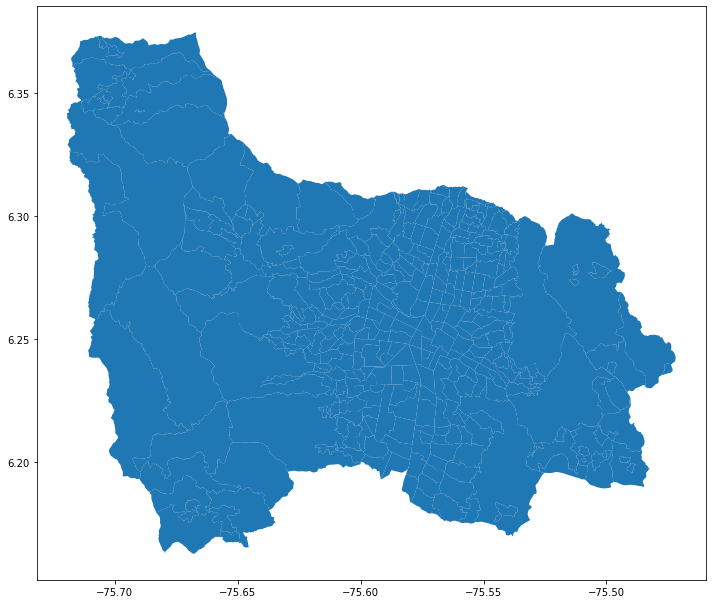

In [56]:
neighbourhoods.plot(figsize=(12, 12))

<br><a href="#TOP">Return to Top</a>

## Partial Conclusions <a class="anchor" id="PC"></a>
<p>Up to this point, I explored four sources of information for studying appropriate places for convenient stores: Foursquare, that provides information regarding actual commercial places geographically referenced enriched with customers comments and qualifications; national police criminal records for Medellín city, having geolocated records that allows us the security risks for different studied places; census records, to to study the population caracteristics for different places, and to complement all this, the polygons describing the different neighbourhoods in the city, to be able to present the information graphically.</p>
<p>Next week exercise will mix all this information together to get to recommendation places to our hypothetical customer</p>
<br><a href="#TOP">Return to Top</a>